In [16]:
import os
import pandas as pd
import importlib

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import performance_utils
importlib.reload(performance_utils)

<module 'performance_utils' from '/oak/stanford/groups/rbaltman/alptartici/substrateSpec/pooling_performances/ENZYMES_EC_number/performance_utils.py'>

!rm logs/mean_pooled/*
!rm logs/max_pooled/*
!rm logs/cls/*
!rm logs/PR_head_norm_attn_max_prune_1inout_no_enh/*    
!rm logs/PR_contact_prune_topk_no_enh/*
!rm logs/CLS_weighted_head_norm_attn_max/*
!rm logs/CLS_weighted_attn_mean/*
!rm logs/CLS_weighted_attn_max/*

In [26]:
pooling = "cls"
metric = "mcc"
log_file_names = os.listdir(f"logs/{pooling}")
log_file_names = [file for file in log_file_names if "log" in file and not "999" in file]
#print(log_file_names)
for file in log_file_names:
    run_no = int(file.split("_")[0])
    human = -2
    mammalian = -2
    vertebrate = -2
    animal = -2
    eukaryote = -2
    path = f"logs/{pooling}/{file}"
    with open(path, "r") as log_file:
        lines = log_file.readlines()
    for line in lines:
        #print(line)
        if "human" in line:
            metrics_side = line.split("{")[1][:-2].split(", ")
            #print(metrics_side)
            for data in metrics_side:
                if metric in data:
                    human = float(data.split(": ")[1])
        if "mammalian" in line:
            metrics_side = line.split("{")[1][:-2].split(", ")
            #print(metrics_side)
            for data in metrics_side:
                if metric in data:
                    mammalian = float(data.split(": ")[1])
        if "vertebrate" in line:
            metrics_side = line.split("{")[1][:-2].split(", ")
            #print(metrics_side)
            for data in metrics_side:
                if metric in data:
                    vertebrate = float(data.split(": ")[1])
        if "animal" in line:
            metrics_side = line.split("{")[1][:-2].split(", ")
            #print(metrics_side)
            for data in metrics_side:
                if metric in data:
                    animal = float(data.split(": ")[1])
        if "eukaryote" in line:
            metrics_side = line.split("{")[1][:-2].split(", ")
            #print(metrics_side)
            for data in metrics_side:
                if metric in data:
                    eukaryote = float(data.split(": ")[1])

    if human > -2 and mammalian > -2 and vertebrate > -2 and animal > -2 and eukaryote > -2:
        print(human, mammalian, vertebrate, animal, eukaryote)
            

    

0.3779644730092272 0.39391929857916763 0.43213581570144294 0.45162588662070896 0.42701431843806353
0.48038446141526137 0.5782544988262073 0.5952380952380952 0.5834048327900985 0.5434750990071615


In [8]:
os.listdir(f"logs/{pooling}")

['.ipynb_checkpoints', '1_log.txt', '0_log.txt', '999_log.txt', '2_log.txt']

In [169]:
performance_utils.extract_metrics("cls", "mcc", sort_by="animal")

,run_no,human,mammalian,vertebrate,animal,eukaryote
51,71,1.000000,0.813676,0.769517,0.768585,0.641221
52,67,0.881917,0.719195,0.737711,0.728282,0.686683
45,83,0.750000,0.666146,0.675928,0.719092,0.670875
56,87,0.750000,0.666146,0.675928,0.719092,0.670875
63,61,0.881917,0.749627,0.737711,0.716852,0.661486
...,...,...,...,...,...,...
36,1,0.377964,0.393919,0.432136,0.451626,0.427014
42,5,0.377964,0.393919,0.432136,0.451626,0.427014
93,12,0.674200,0.525226,0.539449,0.435006,0.408886
67,6,0.577350,0.472940,0.397988,0.410274,0.432947


In [171]:
performance_utils.extract_metrics("PR_contact_prune_topk_no_enh", "mcc", sort_by="animal")

,run_no,human,mammalian,vertebrate,animal,eukaryote
87,14,0.881917,0.719195,0.694713,0.738852,0.671903
91,95,0.881917,0.749627,0.683305,0.721776,0.760688
50,47,0.881917,0.781076,0.707623,0.721776,0.747346
28,18,0.774597,0.660895,0.653720,0.714920,0.722032
29,63,0.774597,0.719195,0.698358,0.706080,0.749022
...,...,...,...,...,...,...
74,62,0.674200,0.578254,0.557806,0.524883,0.582948
89,91,0.674200,0.578254,0.576390,0.508654,0.565507
48,29,0.480384,0.499041,0.503282,0.466667,0.493174
70,44,0.674200,0.551597,0.454760,0.448543,0.593284


In [173]:
performance_utils.extract_metrics("max_pooled", "mcc", sort_by="animal")

,run_no,human,mammalian,vertebrate,animal,eukaryote
0,6,0.881917,0.697874,0.721391,0.717930,0.722320
7,44,0.881917,0.749627,0.783119,0.682357,0.684347
23,21,0.881917,0.666146,0.675928,0.664183,0.675513
89,95,0.881917,0.749627,0.715937,0.661026,0.678208
9,91,0.881917,0.749627,0.715937,0.661026,0.678208
...,...,...,...,...,...,...
8,10,0.674200,0.551597,0.503282,0.474008,0.534578
29,8,0.674200,0.525226,0.503282,0.448543,0.497667
16,12,0.674200,0.525226,0.503282,0.448543,0.497667
46,68,0.480384,0.393919,0.360375,0.330203,0.330857


In [174]:
performance_utils.extract_metrics("mean_pooled", "mcc", sort_by="animal")

,run_no,human,mammalian,vertebrate,animal,eukaryote
45,14,0.774597,0.719195,0.715937,0.730003,0.718821
78,95,0.881917,0.730613,0.707623,0.714168,0.720845
7,91,0.881917,0.730613,0.707623,0.714168,0.720845
15,18,0.881917,0.719195,0.675928,0.706080,0.718738
30,35,0.881917,0.719195,0.675928,0.706080,0.709346
...,...,...,...,...,...,...
54,60,0.577350,0.551597,0.539449,0.517470,0.616871
76,56,0.577350,0.551597,0.539449,0.517470,0.616871
57,20,0.480384,0.446808,0.432136,0.507976,0.570855
14,16,0.480384,0.446808,0.432136,0.507976,0.570855


In [177]:
import performance_utils
importlib.reload(performance_utils)

<module 'performance_utils' from '/oak/stanford/groups/rbaltman/alptartici/substrateSpec/pooling_performances/ENZYMES_EC_number/performance_utils.py'>

# one at a time

In [10]:
import performance_utils
importlib.reload(performance_utils)

<module 'performance_utils' from '/oak/stanford/groups/rbaltman/alptartici/substrateSpec/pooling_performances/ENZYMES_EC_number/performance_utils.py'>

In [7]:
list_of_methods = ["PR_contact_prune_topk_no_enh", "mean_pooled", "max_pooled", "cls"]
#list_of_methods = os.listdir("logs")

In [8]:
import matplotlib.pyplot as plt

def create_color_dict(pooling_methods):
    # Create a color map using a sufficiently distinct color palette
    color_map = plt.cm.get_cmap('tab20', len(pooling_methods))
    color_dict = {method: color_map(i) for i, method in enumerate(pooling_methods)}
    return color_dict
list_of_methods = sorted(list_of_methods)
color_dict = create_color_dict(list_of_methods)

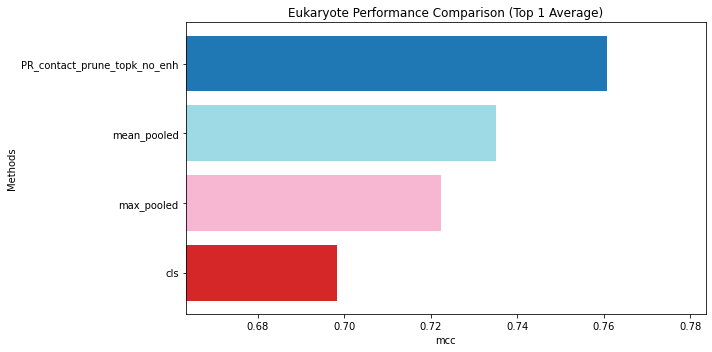

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
0,95.0,0.881917,0.749627,0.683305,0.721776,0.760688,PR_contact_prune_topk_no_enh
3,65.0,0.881917,0.719195,0.636630,0.673308,0.735155,mean_pooled
2,6.0,0.881917,0.697874,0.721391,0.717930,0.722320,max_pooled
1,92.0,0.881917,0.660895,0.673989,0.673031,0.698317,cls


In [25]:
performance_utils.analyze_and_plot_single(pooling_methods=list_of_methods, color_dict=color_dict, metric="mcc", category="eukaryote")

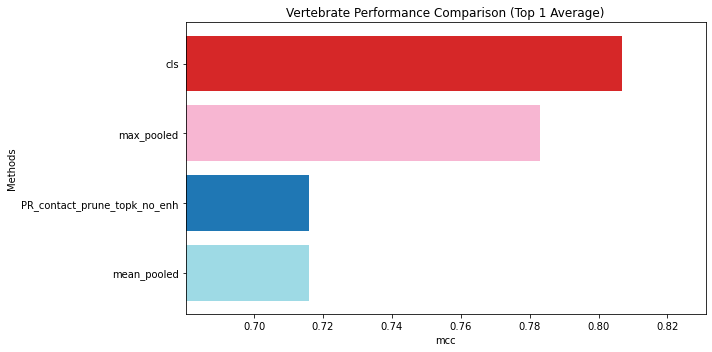

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
1,41.0,1.000000,0.813676,0.806872,0.705621,0.643104,cls
2,44.0,0.881917,0.749627,0.783119,0.682357,0.684347,max_pooled
0,50.0,0.774597,0.660895,0.715937,0.623610,0.676968,PR_contact_prune_topk_no_enh
3,14.0,0.774597,0.719195,0.715937,0.730003,0.718821,mean_pooled


In [26]:
performance_utils.analyze_and_plot_single(pooling_methods=list_of_methods, color_dict=color_dict, metric="mcc", category="vertebrate")

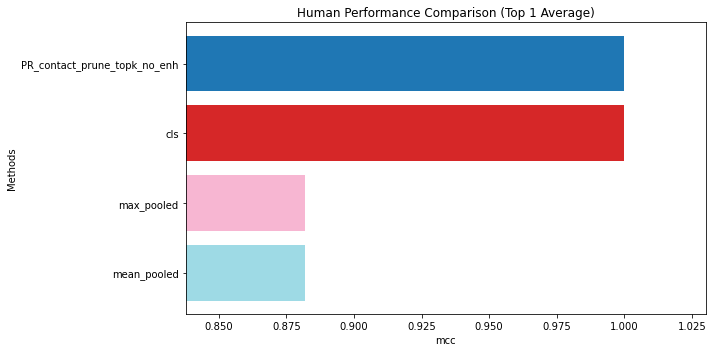

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
0,83.0,1.000000,0.689655,0.694713,0.600574,0.652118,PR_contact_prune_topk_no_enh
1,45.0,1.000000,0.813676,0.806872,0.705621,0.643104,cls
2,71.0,0.881917,0.719195,0.715937,0.650336,0.676731,max_pooled
3,63.0,0.881917,0.719195,0.675928,0.694440,0.725697,mean_pooled


In [27]:
#performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'human', color_dict, save_path="figs/Fig#213#-human_enzyme_pred.png")

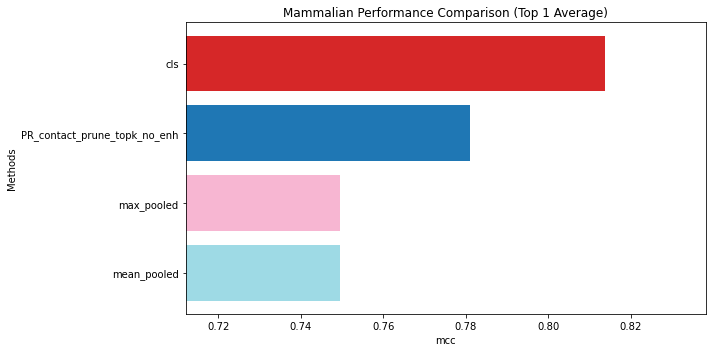

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
1,41.0,1.000000,0.813676,0.806872,0.705621,0.643104,cls
0,47.0,0.881917,0.781076,0.707623,0.721776,0.747346,PR_contact_prune_topk_no_enh
2,95.0,0.881917,0.749627,0.715937,0.661026,0.678208,max_pooled
3,69.0,0.881917,0.749627,0.675928,0.671753,0.709574,mean_pooled


In [28]:
#performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'mammalian', color_dict, save_path="figs/Fig#214#-mammalian_enzyme_pred.png")
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'mammalian', color_dict)

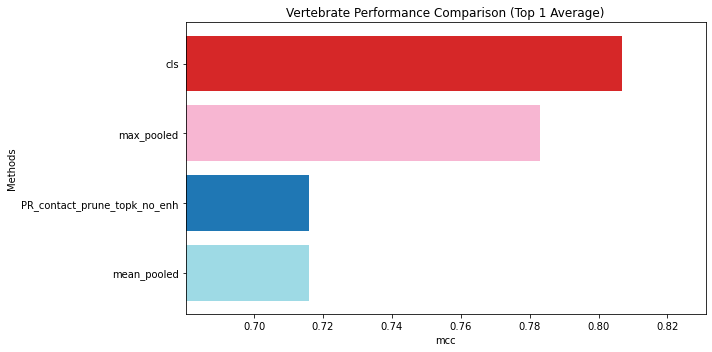

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
1,41.0,1.000000,0.813676,0.806872,0.705621,0.643104,cls
2,44.0,0.881917,0.749627,0.783119,0.682357,0.684347,max_pooled
0,50.0,0.774597,0.660895,0.715937,0.623610,0.676968,PR_contact_prune_topk_no_enh
3,14.0,0.774597,0.719195,0.715937,0.730003,0.718821,mean_pooled


In [29]:
#performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'vertebrate', color_dict, save_path="figs/Fig#215#-vertebrate_enzyme_pred.png")
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'vertebrate', color_dict)

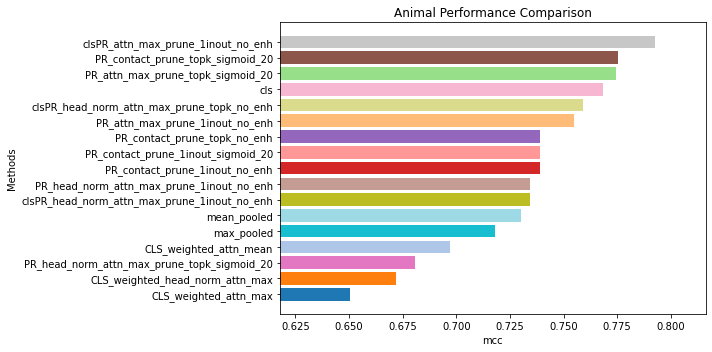

In [220]:
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'animal', color_dict, save_path="figs/Fig#216#-animal_enzyme_pred.png")

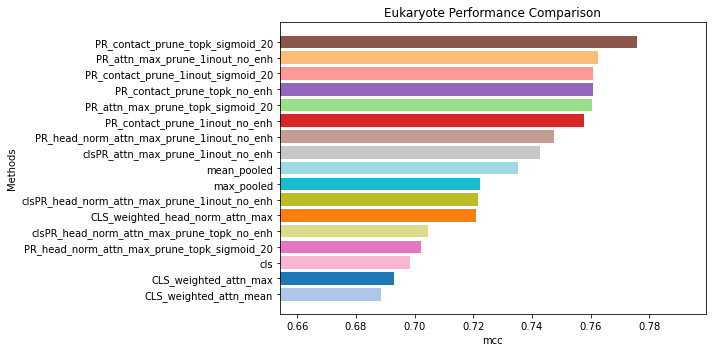

In [8]:
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'eukaryote', color_dict, save_path="figs/Fig#217#-eukaryote_enzyme_pred.png")

## checking for AUPRC

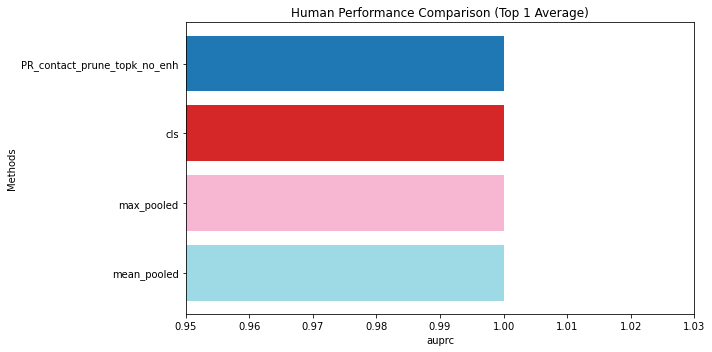

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
0,51.0,1.0,0.983237,0.967337,0.973120,0.942136,PR_contact_prune_topk_no_enh
1,12.0,1.0,0.966234,0.964228,0.957302,0.890033,cls
2,24.0,1.0,0.980606,0.983626,0.970159,0.949057,max_pooled
3,63.0,1.0,0.980427,0.972622,0.975127,0.953325,mean_pooled


In [30]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'human', color_dict, save_path=None)

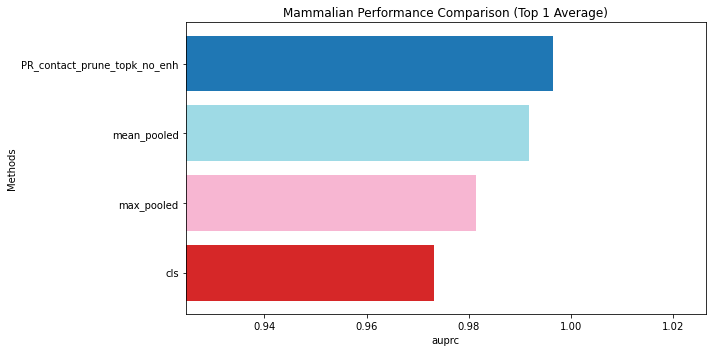

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
0,52.0,1.0,0.996430,0.982181,0.979065,0.965269,PR_contact_prune_topk_no_enh
3,32.0,1.0,0.991833,0.969261,0.976288,0.958676,mean_pooled
2,21.0,1.0,0.981380,0.983886,0.963942,0.936197,max_pooled
1,59.0,1.0,0.973287,0.970411,0.967743,0.929711,cls


In [31]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'mammalian', color_dict, save_path=None)

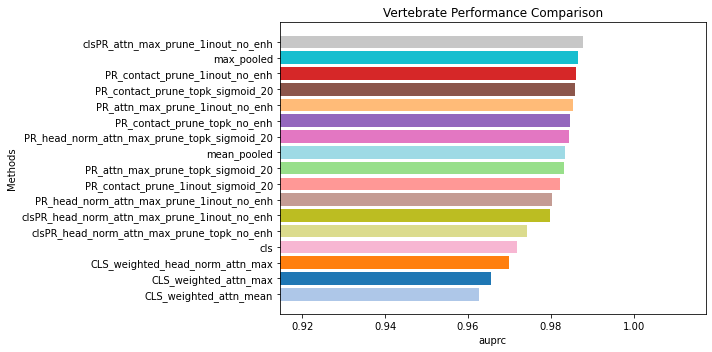

In [227]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'vertebrate', color_dict, save_path=None)

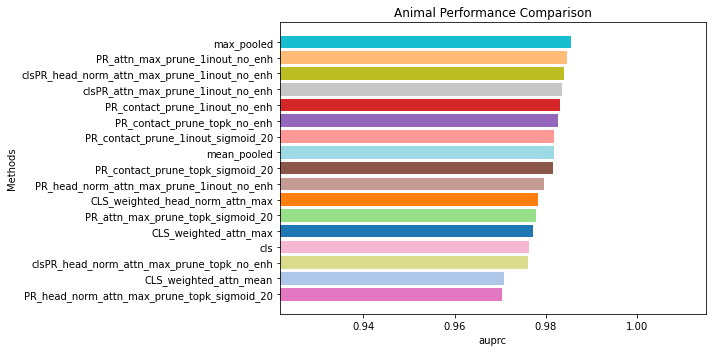

In [228]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'animal', color_dict, save_path=None)

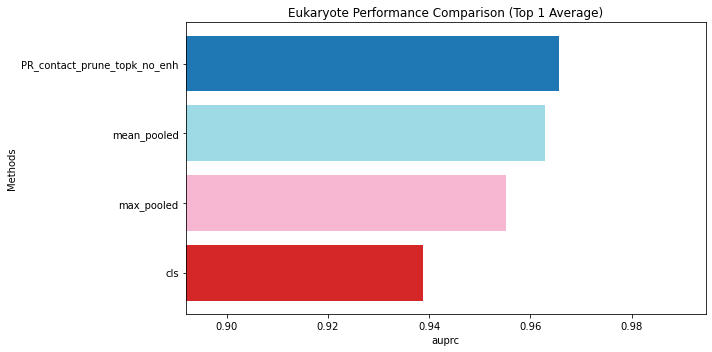

,run_no,human,mammalian,vertebrate,animal,eukaryote,method
0,50.0,1.0,0.993237,0.984511,0.981074,0.965660,PR_contact_prune_topk_no_enh
3,57.0,1.0,0.980584,0.967119,0.973098,0.962928,mean_pooled
2,94.0,1.0,0.976269,0.981774,0.979110,0.955236,max_pooled
1,19.0,1.0,0.971144,0.970608,0.974483,0.938854,cls


In [32]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'eukaryote', color_dict, save_path=None)

# checking for top 3

In [12]:
performance_utils.extract_metrics("cls", "mcc", "mammalian")

,run_no,human,mammalian,vertebrate,animal,eukaryote
78,41,1.000000,0.813676,0.806872,0.705621,0.643104
77,45,1.000000,0.813676,0.806872,0.705621,0.643104
51,71,1.000000,0.813676,0.769517,0.768585,0.641221
0,39,0.881917,0.749627,0.737711,0.716115,0.668927
40,57,0.881917,0.749627,0.737711,0.716852,0.661486
...,...,...,...,...,...,...
28,48,0.377964,0.446808,0.467610,0.588348,0.515156
54,91,0.480384,0.420517,0.360375,0.461538,0.486656
89,95,0.480384,0.420517,0.360375,0.461538,0.486656
36,1,0.377964,0.393919,0.432136,0.451626,0.427014


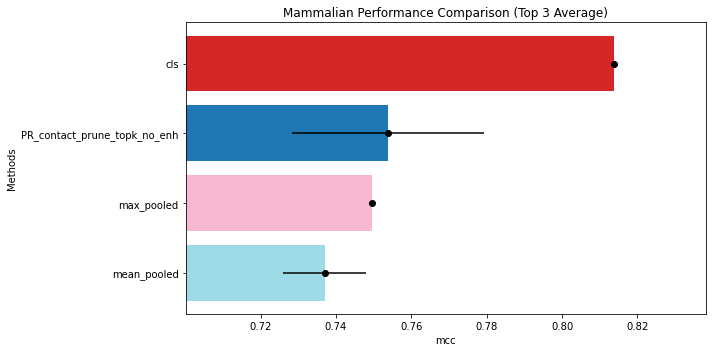

,run_no,human,mammalian,vertebrate,animal,eukaryote,mammalian_std,method
1,52.333333,1.000000,0.813676,0.794420,0.726609,0.642477,0.000000,cls
0,51.666667,0.837945,0.753772,0.691411,0.676364,0.719683,0.025485,PR_contact_prune_topk_no_enh
2,54.333333,0.881917,0.749627,0.753048,0.641603,0.649234,0.000000,max_pooled
3,85.000000,0.881917,0.736951,0.697058,0.700030,0.717088,0.010978,mean_pooled


In [11]:
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'mammalian', color_dict, save_path=None, k=3)

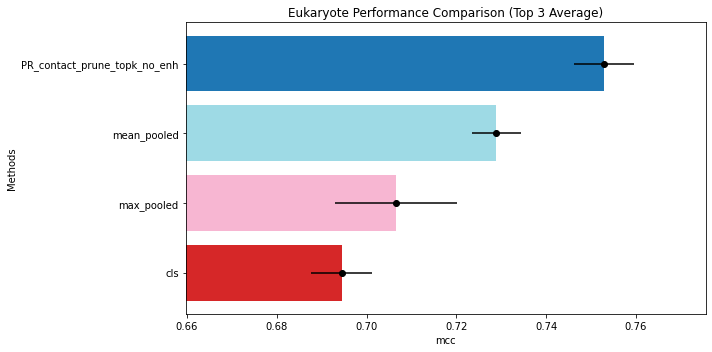

,run_no,human,mammalian,vertebrate,animal,eukaryote,eukaryote_std,method
0,72.333333,0.810370,0.729339,0.693340,0.711312,0.752911,0.006735,PR_contact_prune_topk_no_enh
3,62.333333,0.881917,0.719195,0.662828,0.687396,0.728850,0.005461,mean_pooled
2,56.666667,0.881917,0.692395,0.676277,0.659436,0.706586,0.013626,max_pooled
1,82.333333,0.881917,0.680328,0.695229,0.691448,0.694439,0.006717,cls


In [13]:
performance_utils.analyze_and_plot_single(list_of_methods, 'mcc', 'eukaryote', color_dict, save_path=None, k=3)

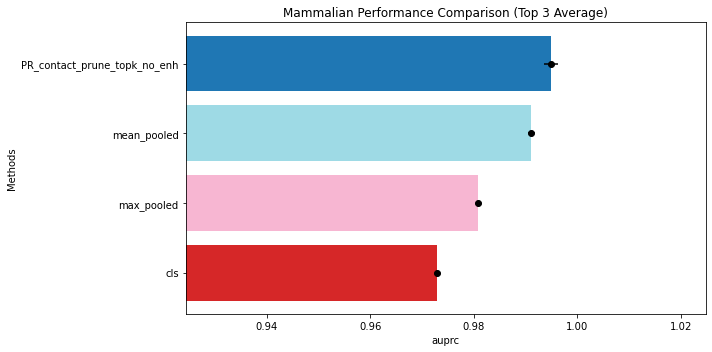

,run_no,human,mammalian,vertebrate,animal,eukaryote,mammalian_std,method
0,26.000000,1.0,0.994951,0.980376,0.977818,0.960362,0.001288,PR_contact_prune_topk_no_enh
3,54.333333,1.0,0.991108,0.975324,0.976077,0.955707,0.000676,mean_pooled
2,24.333333,1.0,0.980864,0.983712,0.968087,0.944770,0.000447,max_pooled
1,62.666667,1.0,0.973000,0.968399,0.967135,0.927302,0.000497,cls


In [14]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'mammalian', color_dict, save_path=None, k=3)

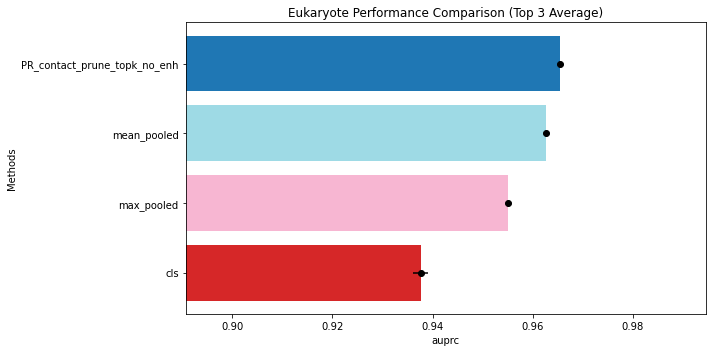

,run_no,human,mammalian,vertebrate,animal,eukaryote,eukaryote_std,method
0,52.000000,1.00000,0.994301,0.983734,0.980404,0.965530,0.000226,PR_contact_prune_topk_no_enh
3,62.000000,0.99537,0.980455,0.967873,0.974670,0.962696,0.000401,mean_pooled
2,74.000000,1.00000,0.976863,0.983338,0.981199,0.955052,0.000318,max_pooled
1,50.333333,0.99537,0.964575,0.969087,0.972484,0.937603,0.001440,cls


In [15]:
performance_utils.analyze_and_plot_single(list_of_methods, 'auprc', 'eukaryote', color_dict, save_path=None, k=3)

# get accuracies

In [41]:
import performance_utils
importlib.reload(performance_utils)

<module 'performance_utils' from '/oak/stanford/groups/rbaltman/alptartici/substrateSpec/pooling_performances/ENZYMES_EC_number/performance_utils.py'>

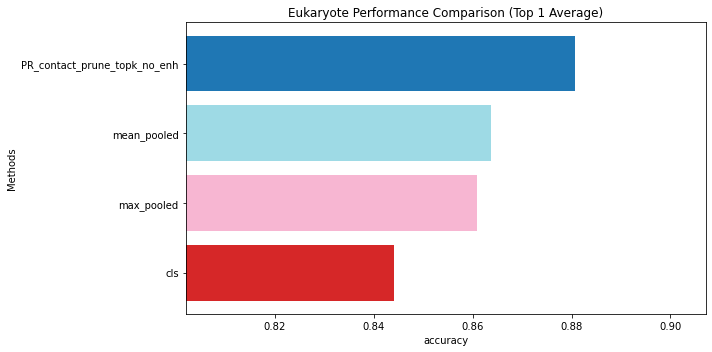

,run_no,eukaryote,method
0,95.0,0.880682,PR_contact_prune_topk_no_enh
3,95.0,0.863636,mean_pooled
2,6.0,0.860795,max_pooled
1,88.0,0.844193,cls


In [43]:
performance_utils.analyze_and_plot_single(list_of_methods, 'accuracy', 'eukaryote', color_dict, save_path=None, k=1)

In [53]:
performance_utils.extract_accuracy('PR_contact_prune_topk_no_enh', 'eukaryote')

,run_no,eukaryote
31,95,0.880682
49,47,0.875000
15,59,0.869318
35,63,0.869318
64,79,0.863636
...,...,...
22,7,0.758523
55,58,0.744318
63,62,0.744318
72,91,0.744318


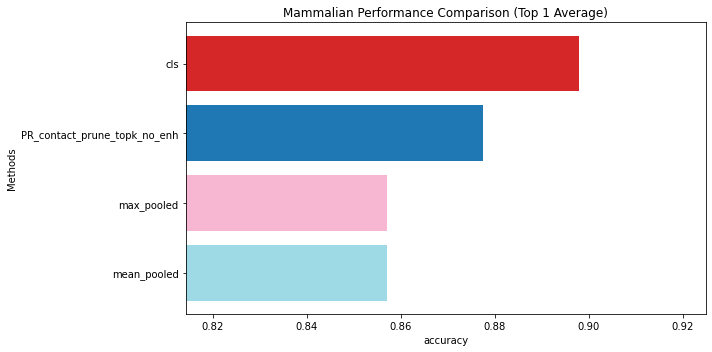

,run_no,mammalian,method
1,71.0,0.897959,cls
0,47.0,0.877551,PR_contact_prune_topk_no_enh
2,24.0,0.857143,max_pooled
3,95.0,0.857143,mean_pooled


In [44]:
performance_utils.analyze_and_plot_single(list_of_methods, 'accuracy', 'mammalian', color_dict, save_path=None, k=1)

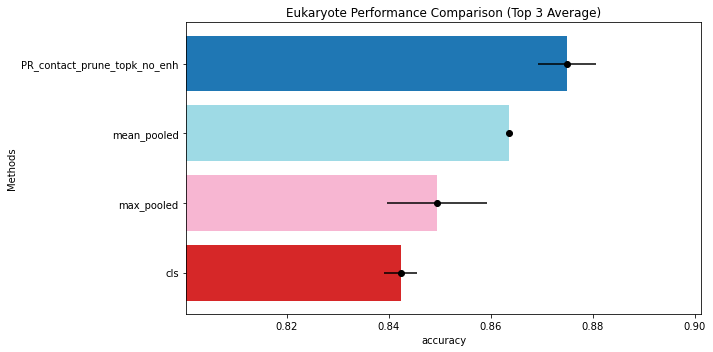

,run_no,eukaryote,eukaryote_std,method
0,68.333333,0.875000,0.005682,PR_contact_prune_topk_no_enh
3,83.666667,0.863636,0.000000,mean_pooled
2,51.333333,0.849432,0.009841,max_pooled
1,89.000000,0.842304,0.003271,cls


In [45]:
performance_utils.analyze_and_plot_single(list_of_methods, 'accuracy', 'eukaryote', color_dict, save_path=None, k=3)

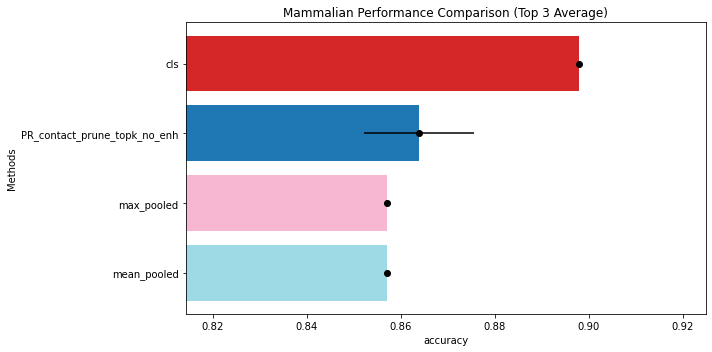

,run_no,mammalian,mammalian_std,method
1,52.333333,0.897959,0.000000,cls
0,23.000000,0.863946,0.011783,PR_contact_prune_topk_no_enh
2,70.000000,0.857143,0.000000,max_pooled
3,85.000000,0.857143,0.000000,mean_pooled


In [46]:
performance_utils.analyze_and_plot_single(list_of_methods, 'accuracy', 'mammalian', color_dict, save_path=None, k=3)

In [57]:
performance_utils.extract_metrics('PR_contact_prune_topk_no_enh', 'auprc','mammalian')

,run_no,human,mammalian,vertebrate,animal,eukaryote
23,52,1.000000,0.996430,0.982181,0.979065,0.965269
21,11,1.000000,0.994347,0.975295,0.977161,0.958038
38,15,1.000000,0.994078,0.983651,0.977228,0.957780
68,54,1.000000,0.993237,0.984511,0.981074,0.965660
14,50,1.000000,0.993237,0.984511,0.981074,0.965660
...,...,...,...,...,...,...
19,13,0.951923,0.965628,0.954922,0.956030,0.946130
26,9,0.951923,0.965628,0.954922,0.956030,0.946130
6,28,0.946429,0.946363,0.947947,0.967195,0.944810
62,24,0.946429,0.946363,0.947947,0.967195,0.944810


In [64]:
performance_utils.extract_metrics('cls', 'auprc', 'mammalian')

,run_no,human,mammalian,vertebrate,animal,eukaryote
20,63,1.000000,0.973287,0.970411,0.967743,0.929711
8,59,1.000000,0.973287,0.970411,0.967743,0.929711
6,70,1.000000,0.972426,0.964375,0.965921,0.922483
55,66,1.000000,0.972426,0.964375,0.965921,0.922483
47,60,1.000000,0.971487,0.966836,0.973618,0.923152
...,...,...,...,...,...,...
67,6,0.986111,0.934287,0.926352,0.942294,0.899554
35,29,0.952629,0.932204,0.945440,0.954882,0.892794
2,36,0.952629,0.927531,0.938556,0.954099,0.907836
36,1,1.000000,0.919157,0.942053,0.948151,0.892647
